In [49]:
# do the imports
import api
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as mplpt
import pandas as pd
import matplotlib.dates as mdates

In [45]:
def display_boxplot(ccg='14L', bnf = '5.1', year = False):
    """Plot a boxplot of prescriptions for a particular bnf code for a given year.

    Arguments:
        ccg {string} -- A string representing a CCG, this can be a name e.g Manchester or a CCG code e.g 14L
        bnf {string} -- A bnf code for a given BNF section e.g 5.1 for Antibacterial drugs
        year {integer} -- A year for which to plot. (Optional, might be useful to look at monthly trends regardless of year)
    
    Returns:
        matplotlib plot -- A matplotlib box plot
    """    
    # Get the CCG info using the function in api.py 
    ccg_info = api.get_ccg_info(ccg)
    # Get the bnf info using the function in api.py
    bnf_info = api.get_bnf_info(bnf)

    # Get a merged dataframe for the CCG for a BNF section
    df = api.get_merged_dataframe(ccg_info['code'], bnf_info['id'])

    # Calculate the items per patient 
    df["items_per_patient"] = df["items"] / df["total_list_size"]

    # Convert the date column to a datetime column making it easier to plot
    df["date"] = pd.to_datetime(df["date"])#
    
    # Make a separate year and month column for filtering reasons
    df["month"] = [d.month for d in df['date']]
    df["year"] = [d.year for d in df['date']]

    # If a year has been defined, filter by that year
    if year:
        df = df[df.year == year]

    # Plot the dataframe using a boxplot
    plot = df.boxplot(column = 'items_per_patient', by = 'month')

    # Set the plots titles
    plot.set_title(f"Prescriptions of {bnf_info['name']} per patient across \n {ccg_info['name']} throughout {year}")
    plot.figure.suptitle('')
    plot.set_ylabel('Items prescribed per patient')
    plot.set_xlabel('Month')

    
    return plot

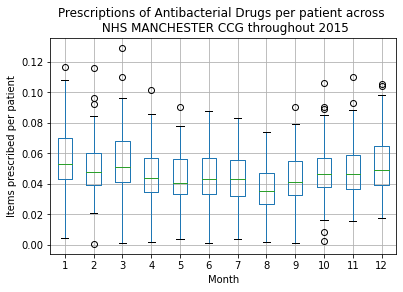

In [48]:
# Run the function for the Manchester CCG in the Antibacterial Drugs section
plot = display_boxplot('manchester', 'Antibacterial Drugs', year = 2015)


In [50]:
# Save it to a file
plot.figure.savefig('boxplot.png', pad_inches=0.1, dpi)